In [1]:
import os
import zipfile
import glob

In [2]:
from tinkoff.invest import Client, CandleInterval, InstrumentIdType
from pprint import pprint
from tinkoff.invest.utils import quotation_to_decimal, decimal_to_quotation, now
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [3]:
import numpy as np
import torch

In [9]:
TOKEN = ''

In [10]:
with Client(TOKEN) as client:
    rsp = client.instruments.get_favorites()
    favorites = rsp.favorite_instruments
    favorites = [favorite for favorite in favorites if favorite.instrument_type == 'share']
    favorites = [favorite for favorite in favorites if favorite.ticker == 'ROSN']

In [11]:
figis = []
for favorite in favorites:
    figis.append(favorite.figi)

In [12]:
f = open("data/figi.txt", "w")

for favorite in favorites:
    f.write(favorite.figi + "\n")

f.close()

In [13]:
%%bash
SCRIPT_DIR=$( cd -- "$( dirname -- "${BASH_SOURCE[0]}" )" &> /dev/null && pwd )
cd data
$SCRIPT_DIR/sh/download_md.sh

downloading BBG004731354 for year 2023
downloading BBG004731354 for year 2022
downloading BBG004731354 for year 2021
downloading BBG004731354 for year 2020
downloading BBG004731354 for year 2019
downloading BBG004731354 for year 2018
downloading BBG004731354 for year 2017
data not found for figi=BBG004731354, year=2017, removing empty file


In [14]:

extract_from_dir = 'data/zip/'
extract_to_dir = 'data/csv/'

for subdir, dirs, files in os.walk(extract_from_dir):
    for file in files:
        figi = subdir.split("/")[-1]
        if figi in figis:
            extract_to = extract_to_dir + figi
            print("Unzip " + os.path.join(subdir, file) + " to " + extract_to)
            try:
                with zipfile.ZipFile(os.path.join(subdir, file), 'r') as zip_ref:
                    zip_ref.extractall(extract_to)
            except Exception as e:
                print(e)

Unzip data/zip/BBG004731354/BBG004731354_2018.zip to data/csv/BBG004731354
Unzip data/zip/BBG004731354/BBG004731354_2019.zip to data/csv/BBG004731354
Unzip data/zip/BBG004731354/BBG004731354_2020.zip to data/csv/BBG004731354
Unzip data/zip/BBG004731354/BBG004731354_2021.zip to data/csv/BBG004731354
Unzip data/zip/BBG004731354/BBG004731354_2022.zip to data/csv/BBG004731354
Unzip data/zip/BBG004731354/BBG004731354_2023.zip to data/csv/BBG004731354


In [145]:
for figi in figis:
    li = []

    # list all csv files only
    csv_files = glob.glob("data/csv/{}/*.csv".format(figi))

    i = 0
    # append the CSV files
    for file in csv_files:
        df_tmp = pd.read_csv(file, index_col=False, sep=";", names=['ID', "Datetime", "Open", "Close", "Max", "Min", "Volume"], parse_dates=["Datetime"])
        li.append(df_tmp)
        if i > 1:
            break
        else:
            i = i + 1

    df  = pd.concat(li, axis=0)
    df.drop(columns=df.columns[0], axis=1, inplace=True)
    print(df)

                     Datetime    Open   Close     Max     Min  Volume
0   2018-03-07 18:33:00+00:00  315.70  315.70  315.70  315.70       3
1   2018-03-07 18:34:00+00:00  315.75  315.75  315.75  315.75       6
2   2018-03-07 18:36:00+00:00  315.60  315.75  315.75  315.60     259
3   2018-03-07 18:37:00+00:00  315.55  315.50  315.55  315.45      71
4   2018-03-07 18:38:00+00:00  315.45  315.45  315.45  315.20    1365
..                        ...     ...     ...     ...     ...     ...
595 2018-03-09 23:55:00+00:00  312.75  312.70  312.75  312.70      69
596 2018-03-09 23:56:00+00:00  312.70  312.70  312.75  312.70      80
597 2018-03-09 23:57:00+00:00  312.70  312.55  312.70  312.55      79
598 2018-03-09 23:58:00+00:00  312.65  312.90  312.90  312.55    1753
599 2018-03-09 23:59:00+00:00  312.60  312.65  312.70  312.60      98

[915 rows x 6 columns]


In [146]:
df[["Close"]].values.astype('float32')

array([[315.7 ],
       [315.75],
       [315.75],
       [315.5 ],
       [315.45],
       [315.25],
       [315.75],
       [315.7 ],
       [315.6 ],
       [315.6 ],
       [315.7 ],
       [315.55],
       [315.65],
       [315.7 ],
       [315.7 ],
       [315.65],
       [315.55],
       [315.6 ],
       [315.6 ],
       [315.6 ],
       [315.85],
       [315.6 ],
       [315.85],
       [315.6 ],
       [315.75],
       [315.6 ],
       [315.7 ],
       [315.7 ],
       [315.85],
       [315.85],
       [315.9 ],
       [315.9 ],
       [315.9 ],
       [315.7 ],
       [315.55],
       [315.75],
       [315.85],
       [315.3 ],
       [315.4 ],
       [315.3 ],
       [315.35],
       [315.3 ],
       [315.25],
       [315.4 ],
       [315.2 ],
       [315.4 ],
       [315.2 ],
       [315.05],
       [315.05],
       [315.2 ],
       [315.15],
       [315.05],
       [315.05],
       [315.1 ],
       [315.2 ],
       [315.35],
       [315.2 ],
       [315.1 ],
       [315.05

In [147]:
df[["Datetime", "Close"]]

,Datetime,Close
0,2018-03-07 18:33:00+00:00,315.70
1,2018-03-07 18:34:00+00:00,315.75
2,2018-03-07 18:36:00+00:00,315.75
3,2018-03-07 18:37:00+00:00,315.50
4,2018-03-07 18:38:00+00:00,315.45
...,...,...
595,2018-03-09 23:55:00+00:00,312.70
596,2018-03-09 23:56:00+00:00,312.70
597,2018-03-09 23:57:00+00:00,312.55
598,2018-03-09 23:58:00+00:00,312.90


In [165]:
timeseries = df[["Close"]].values.astype('float32')

# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

In [132]:
type(train)

numpy.ndarray

In [100]:
decompose_data = seasonal_decompose(df[["Datetime", "Close"]], model="additive")
decompose_data.plot();

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [149]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X).to(device='cuda'), torch.tensor(y).to(device='cuda')

In [166]:
lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

In [167]:
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [168]:
model = AirModel().cuda()

optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

In [169]:
n_epochs = 50
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 5 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train).cpu())
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test).cpu())
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 311.9801, test RMSE 310.8335
Epoch 5: train RMSE 301.8985, test RMSE 300.7520
Epoch 10: train RMSE 292.8197, test RMSE 291.6732
Epoch 15: train RMSE 284.0456, test RMSE 282.8991
Epoch 20: train RMSE 274.9225, test RMSE 273.7761
Epoch 25: train RMSE 265.4886, test RMSE 264.3421
Epoch 30: train RMSE 256.5378, test RMSE 255.3915
Epoch 35: train RMSE 247.7504, test RMSE 246.6041
Epoch 40: train RMSE 239.0709, test RMSE 237.9247
Epoch 45: train RMSE 230.4754, test RMSE 229.3294


Epoch 0: train RMSE 225.9859, test RMSE 425.2122
Epoch 100: train RMSE 172.4392, test RMSE 368.9426
Epoch 200: train RMSE 133.0862, test RMSE 325.3759
Epoch 300: train RMSE 102.7508, test RMSE 287.8822
Epoch 400: train RMSE 79.7657, test RMSE 254.9194
Epoch 500: train RMSE 61.5963, test RMSE 224.4099
Epoch 600: train RMSE 48.6969, test RMSE 197.8571
Epoch 700: train RMSE 39.4884, test RMSE 174.5672
Epoch 800: train RMSE 33.1966, test RMSE 154.4976
Epoch 900: train RMSE 28.7506, test RMSE 137.2870
Epoch 1000: train RMSE 25.8828, test RMSE 123.0088
Epoch 1100: train RMSE 24.3598, test RMSE 111.6567
Epoch 1200: train RMSE 22.7956, test RMSE 102.5211
Epoch 1300: train RMSE 21.9605, test RMSE 94.9683
Epoch 1400: train RMSE 21.1549, test RMSE 89.9546
Epoch 1500: train RMSE 20.8716, test RMSE 86.1452
Epoch 1600: train RMSE 20.4186, test RMSE 82.6925
Epoch 1700: train RMSE 20.0747, test RMSE 79.7411
Epoch 1800: train RMSE 20.1011, test RMSE 79.2771
Epoch 1900: train RMSE 20.5987, test RMSE 76.6618

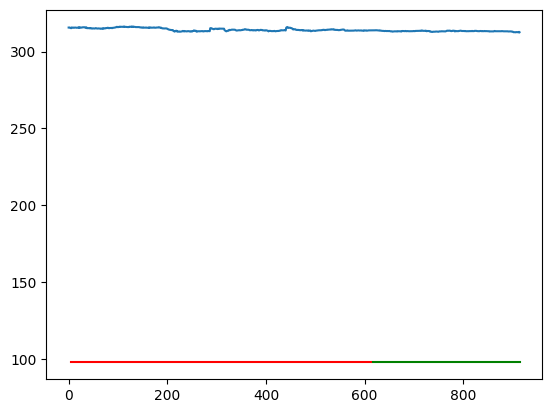

In [170]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train).cpu()[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test).cpu()[:, -1, :]
# plot
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()